# Hand-Written Digit Recognition

This model was built during learning of the Artificial Neural Network. So, it doesn't uses convolutional layers and has only a single hidden layer.

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Loading the data

In [101]:
X_train = np.loadtxt('Dataset/train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('Dataset/train_label.csv', delimiter = ',').T

X_test = np.loadtxt('Dataset/test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('Dataset/test_label.csv', delimiter = ',').T

Shape of the arrays need to be transposed to make each column to hold pixel values.

In [102]:
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (784, 1000)
shape of Y_train : (10, 1000)
shape of X_test : (784, 350)
shape of Y_test : (10, 350)


### Defining the required functions

In [103]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

### Now initializing the parameters

In [104]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.001
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.001
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

We here initialing the weights randomly using the random.randn() which returns an array of floats sampled from the standard normal distribution. Here, were multiplying the weights with 0.001 to shrink down the values (basically shrinking the distribution and sampling from it).

### Forward propagation

In [105]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

### Defining the cost function

In [106]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

### Back propagation

In [107]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

### Updating the parameters

In [108]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## The Complete Model

Here, I'm using a decaying learning rate rather than constant just to try out if I can train the model faster. I started out with a slightly higher learning rate and decay it slowly to avoid overshooting. It showed better results than that model from the tutorial I followed which used an constant learning rate

In [109]:
def model(x, y, n_h, epoch, init_learning_rate, decay_rate):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(epoch):

        learning_rate = init_learning_rate*np.exp(-decay_rate*i)
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%10 == 0):
            print("Cost after", i, "epochs is :", cost)
        
    return parameters, cost_list

### Training the model

Here, as mention a decaying learning rate is used. For faster learning, in my opinion, starting with a higher learning rate like 0.05 and a decay rate like 0.005 should work.

In [110]:
epoch = 100
n_h = 1000
learning_rate = 0.08
decay_rate = 0.005
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, epoch = epoch, init_learning_rate=learning_rate, decay_rate = 0.01)

Cost after 0 epochs is : 2.302217517056659
Cost after 10 epochs is : 0.5978966085795462
Cost after 20 epochs is : 0.39864583571606693
Cost after 30 epochs is : 0.3113267090451209
Cost after 40 epochs is : 0.25893602380069786
Cost after 50 epochs is : 0.22313624944479865
Cost after 60 epochs is : 0.19694117264167688
Cost after 70 epochs is : 0.17695312956222575
Cost after 80 epochs is : 0.1612610023131917
Cost after 90 epochs is : 0.1486828909409561


Plotting the cost wrt. the iteration gives the following results

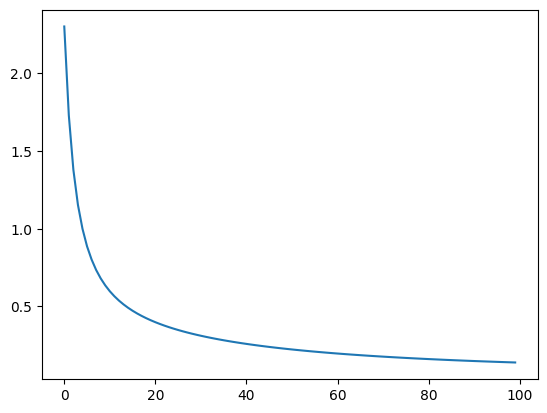

In [111]:
t = np.arange(0, epoch)
plt.plot(t, Cost_list)
plt.show()

### Evaluation of the model

In [112]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [113]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 98.6 %
Accuracy of Test Dataset 86.29 %


#### Demo of the model

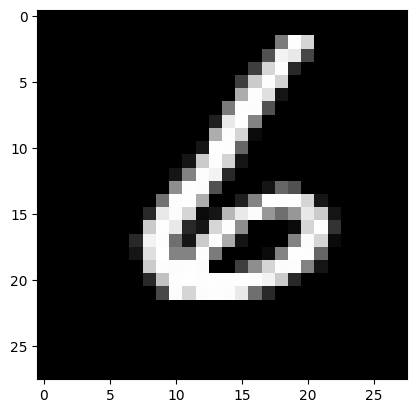

Our model says it is : 6


In [114]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])